In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 13 | bluff
Processing Record 3 of Set 13 | ushuaia
Processing Record 4 of Set 13 | amga
Processing Record 5 of Set 13 | vaini
Processing Record 6 of Set 13 | bom jesus
Processing Record 7 of Set 13 | dikson
Processing Record 8 of Set 13 | rehoboth
Processing Record 9 of Set 13 | puerto ayora
Processing Record 10 of Set 13 | cherskiy
Processing Record 11 of Set 13 | torres
Processing Record 12 of Set 13 | busselton
Processing Record 13 of Set 13 | rikitea
Processing Record 14 of Set 13 | conde
Processing Record 15 of Set 13 | kovylkino
Processing Record 16 of Set 13 | hilo
Processing Record 17 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 13 | san cristobal
Processing Record 19 of Set 13 | severo-kurilsk
Processing Record 20 of Set 13 | laguna
Processing Record 21 of Set 13 | upernavik
Processing Reco

Processing Record 31 of Set 16 | tiksi
Processing Record 32 of Set 16 | sitka
Processing Record 33 of Set 16 | meyungs
City not found. Skipping...
Processing Record 34 of Set 16 | faanui
Processing Record 35 of Set 16 | tongliao
Processing Record 36 of Set 16 | port blair
Processing Record 37 of Set 16 | zhigansk
Processing Record 38 of Set 16 | esso
Processing Record 39 of Set 16 | khatassy
Processing Record 40 of Set 16 | ust-tsilma
Processing Record 41 of Set 16 | bulnes
Processing Record 42 of Set 16 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 43 of Set 16 | teknaf
Processing Record 44 of Set 16 | beringovskiy
Processing Record 45 of Set 16 | haines junction
Processing Record 46 of Set 16 | mirskoy
Processing Record 47 of Set 16 | marawi
Processing Record 48 of Set 16 | mlalo
Processing Record 49 of Set 16 | samalaeulu
City not found. Skipping...
Processing Record 50 of Set 16 | talnakh
Processing Record 1 of Set 17 | port macquarie
Processing Record 2 of Set

City not found. Skipping...
Processing Record 16 of Set 20 | xinmin
Processing Record 17 of Set 20 | orlik
Processing Record 18 of Set 20 | adre
Processing Record 19 of Set 20 | jiddah
City not found. Skipping...
Processing Record 20 of Set 20 | san andres
Processing Record 21 of Set 20 | lompoc
Processing Record 22 of Set 20 | lawrenceburg
Processing Record 23 of Set 20 | vadso
Processing Record 24 of Set 20 | tecpan
Processing Record 25 of Set 20 | dunedin
Processing Record 26 of Set 20 | impfondo
Processing Record 27 of Set 20 | svarstad
Processing Record 28 of Set 20 | mareeba
Processing Record 29 of Set 20 | gerash
Processing Record 30 of Set 20 | lethem
Processing Record 31 of Set 20 | grand river south east
City not found. Skipping...
Processing Record 32 of Set 20 | mbacke
City not found. Skipping...
Processing Record 33 of Set 20 | yumen
Processing Record 34 of Set 20 | monte patria
Processing Record 35 of Set 20 | kawalu
Processing Record 36 of Set 20 | monte santo
Processing

Processing Record 48 of Set 23 | scorteni
Processing Record 49 of Set 23 | vieste
Processing Record 50 of Set 23 | trat
Processing Record 1 of Set 24 | launceston
Processing Record 2 of Set 24 | kokorevka
Processing Record 3 of Set 24 | sheridan
Processing Record 4 of Set 24 | camacha
Processing Record 5 of Set 24 | utiroa
City not found. Skipping...
Processing Record 6 of Set 24 | esmeraldas
Processing Record 7 of Set 24 | kyritz
Processing Record 8 of Set 24 | baykit
Processing Record 9 of Set 24 | yantzaza
Processing Record 10 of Set 24 | marsa matruh
Processing Record 11 of Set 24 | monterey
Processing Record 12 of Set 24 | souillac
Processing Record 13 of Set 24 | skjervoy
Processing Record 14 of Set 24 | zhuhai
Processing Record 15 of Set 24 | gulariya
Processing Record 16 of Set 24 | lima
Processing Record 17 of Set 24 | sofiysk
City not found. Skipping...
Processing Record 18 of Set 24 | porto novo
Processing Record 19 of Set 24 | tarko-sale
Processing Record 20 of Set 24 | te 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,65.23,68,100,5.30,NZ,2022-01-18 00:47:30
1,Ushuaia,-54.8000,-68.3000,47.82,84,82,4.47,AR,2022-01-18 00:47:30
2,Amga,60.8953,131.9608,-29.27,96,100,1.41,RU,2022-01-18 00:47:30
3,Vaini,-21.2000,-175.2000,81.79,85,97,16.37,TO,2022-01-18 00:47:31
4,Bom Jesus,-9.0744,-44.3586,72.10,90,2,1.99,BR,2022-01-18 00:47:31
5,Dikson,73.5069,80.5464,4.57,87,100,9.08,RU,2022-01-18 00:47:31
6,Rehoboth,-23.3167,17.0833,69.37,74,100,5.44,NA,2022-01-18 00:47:32
7,Puerto Ayora,-0.7393,-90.3518,73.13,85,100,5.55,EC,2022-01-18 00:47:32
8,Cherskiy,68.7500,161.3000,-46.44,100,64,2.93,RU,2022-01-18 00:47:32
9,Torres,-29.3353,-49.7269,77.83,92,100,5.06,BR,2022-01-18 00:47:33


In [11]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-01-18 00:47:30,-46.6000,168.3333,65.23,68,100,5.30
1,Ushuaia,AR,2022-01-18 00:47:30,-54.8000,-68.3000,47.82,84,82,4.47
2,Amga,RU,2022-01-18 00:47:30,60.8953,131.9608,-29.27,96,100,1.41
3,Vaini,TO,2022-01-18 00:47:31,-21.2000,-175.2000,81.79,85,97,16.37
4,Bom Jesus,BR,2022-01-18 00:47:31,-9.0744,-44.3586,72.10,90,2,1.99


In [14]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        572 non-null    object 
 1   Country     572 non-null    object 
 2   Date        572 non-null    object 
 3   Lat         572 non-null    float64
 4   Lng         572 non-null    float64
 5   Max Temp    572 non-null    float64
 6   Humidity    572 non-null    int64  
 7   Cloudiness  572 non-null    int64  
 8   Wind Speed  572 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 40.3+ KB


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime('%Y-%m-%d %H:%M:%S')
today

'2022-01-17 19:14:27'

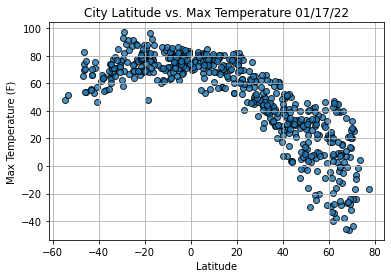

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

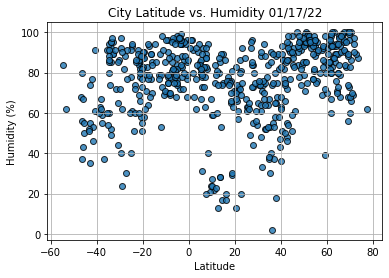

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

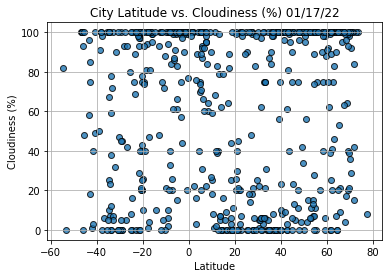

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

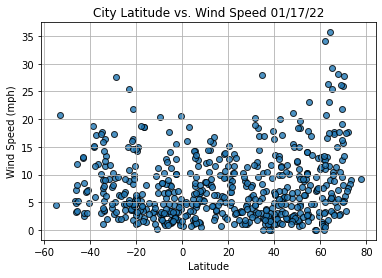

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                    Kovylkino
Country                        RU
Date          2022-01-18 00:47:34
Lat                       54.0388
Lng                       43.9139
Max Temp                    29.37
Humidity                       94
Cloudiness                    100
Wind Speed                  14.14
Name: 13, dtype: object

In [25]:
city_data_df[(city_data_df['Lat'] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Amga,RU,2022-01-18 00:47:30,60.8953,131.9608,-29.27,96,100,1.41
5,Dikson,RU,2022-01-18 00:47:31,73.5069,80.5464,4.57,87,100,9.08
8,Cherskiy,RU,2022-01-18 00:47:32,68.7500,161.3000,-46.44,100,64,2.93
13,Kovylkino,RU,2022-01-18 00:47:34,54.0388,43.9139,29.37,94,100,14.14
14,Hilo,US,2022-01-18 00:47:35,19.7297,-155.0900,82.13,71,0,11.50


In [26]:
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

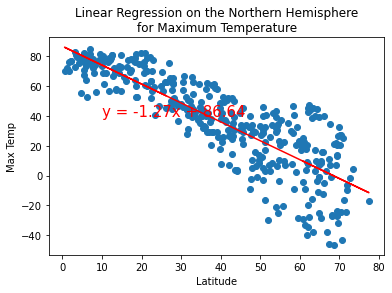

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

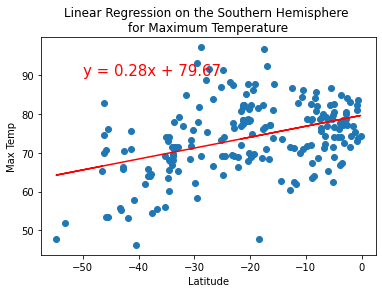

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

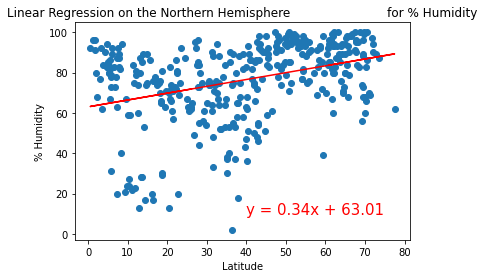

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

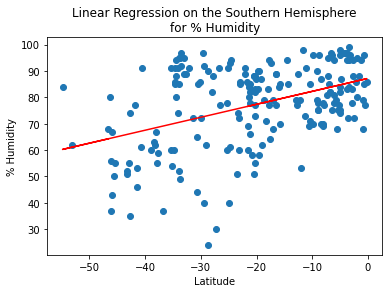

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

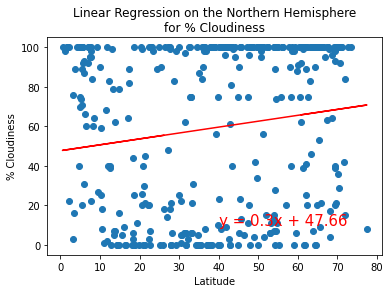

In [31]:
# SKILL DRILL: 6.4.4
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(40,10))

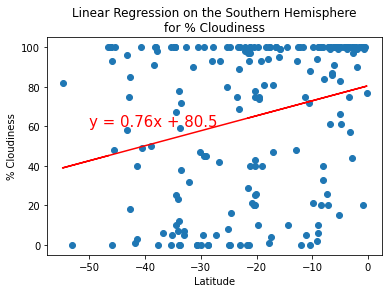

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

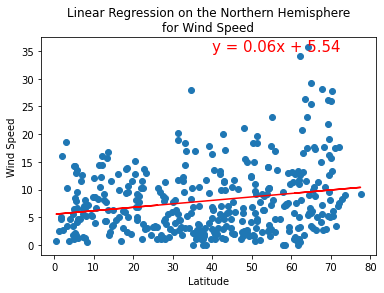

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))

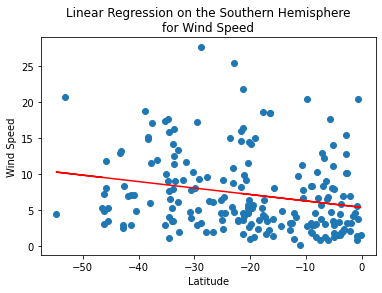

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,35))

In [42]:
# Import the dependencies.
import pandas as pd
import gmaps
import gmaps.datasets
import requests
# Import the API key.
from config import g_key

In [43]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Bluff,NZ,2022-01-18 00:47:30,-46.6000,168.3333,65.23,68,100,5.30
1,1,Ushuaia,AR,2022-01-18 00:47:30,-54.8000,-68.3000,47.82,84,82,4.47
2,2,Amga,RU,2022-01-18 00:47:30,60.8953,131.9608,-29.27,96,100,1.41
3,3,Vaini,TO,2022-01-18 00:47:31,-21.2000,-175.2000,81.79,85,97,16.37
4,4,Bom Jesus,BR,2022-01-18 00:47:31,-9.0744,-44.3586,72.10,90,2,1.99


In [44]:
city_data_df.count()

City_ID       572
City          572
Country       566
Date          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
dtype: int64

In [45]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [50]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [51]:
# Heatmap of temperature
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)